# Imports

In [ ]:
import os, glob, requests,  statistics
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

from tensorflow.keras import layers, Sequential, models, losses, utils, Model
from tensorflow import image
from tensorflow.keras.datasets import cifar10

# Descargar imagen desde un url

In [ ]:
def download_file(url, name):
    img_data = requests.get(url).content
    with open(name, 'wb') as handler:
        handler.write(img_data)

In [ ]:
download_file("https://drive.google.com/uc?id=1xqWAcHjIXzCBPhMZugATiYWnbgl3mx_r", "Parrot.png")

In [ ]:
import cv2
img_parrot = cv2.imread('/content/Parrot.png')
img_parrot = img_parrot / 255

# Transformaciones

## Crop

In [ ]:
transform = Sequential([
  layers.RandomCrop(512,512)
])
augmented_parrot = transform(img_parrot)

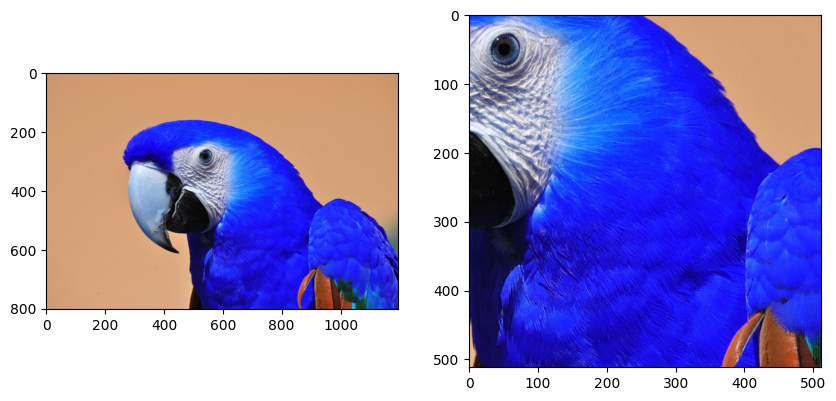

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Horizontal flip

In [ ]:
transform = Sequential([
  layers.RandomFlip('horizontal')
])
augmented_parrot = transform(img_parrot)

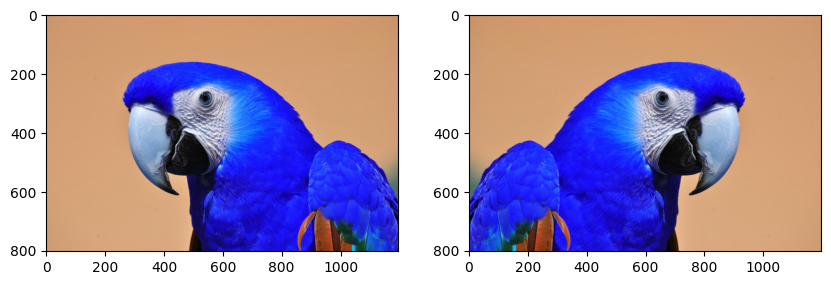

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Vertical flip

In [ ]:
transform = Sequential([
  layers.RandomFlip('vertical')
])
augmented_parrot = transform(img_parrot)

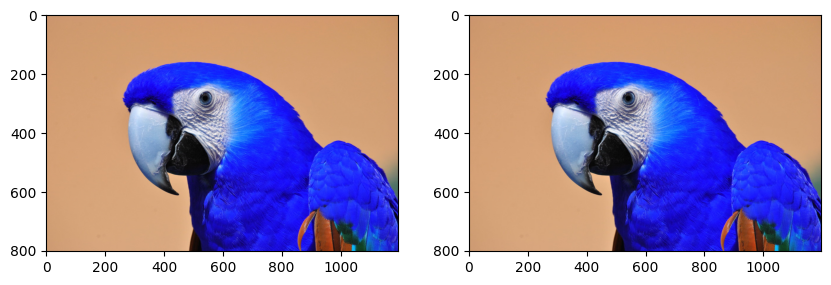

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Rotation

In [ ]:
transform = Sequential([
  layers.RandomRotation(factor=(-0.2, 0.2))
])
augmented_parrot = transform(img_parrot)

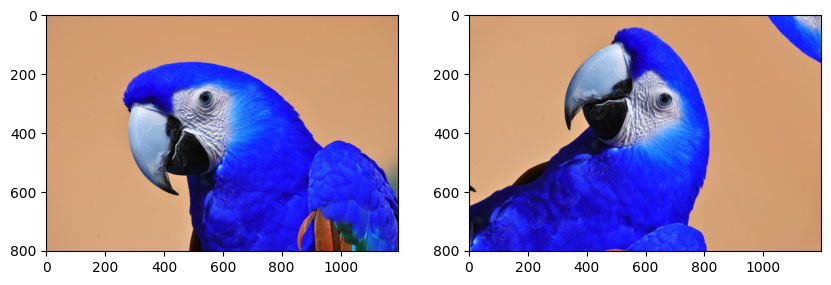

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Translation

In [ ]:
transform = Sequential([
  layers.RandomTranslation(height_factor=(-0.2, 0.2),
                           width_factor=(-0.2, 0.2))
])
augmented_parrot = transform(img_parrot)

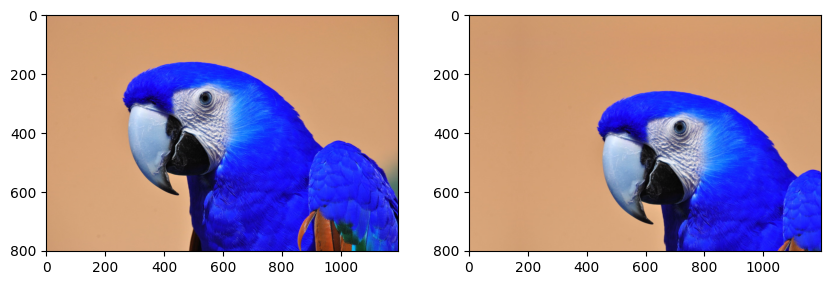

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Brightness changes

In [ ]:
augmented_parrot = image.stateless_random_brightness(img_parrot, max_delta=0.2, seed=(1,1))

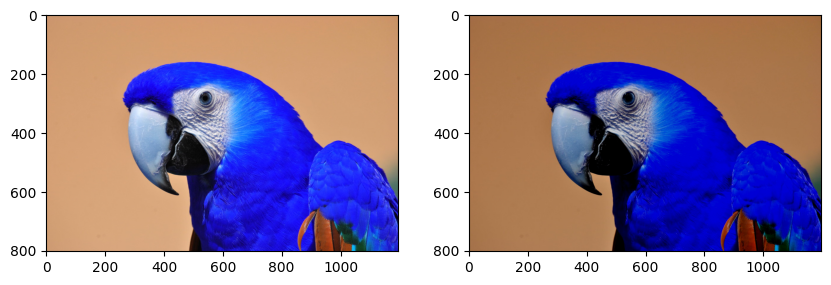

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Contrast changes

In [ ]:
transform = Sequential([
  layers.RandomContrast(factor=0.7)
])
augmented_parrot = transform(img_parrot)

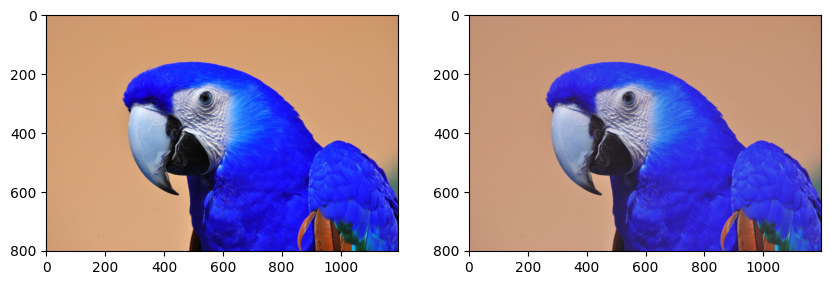

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Hue changes

In [ ]:
augmented_parrot = image.stateless_random_hue(img_parrot, max_delta=0.2, seed=(1,1))

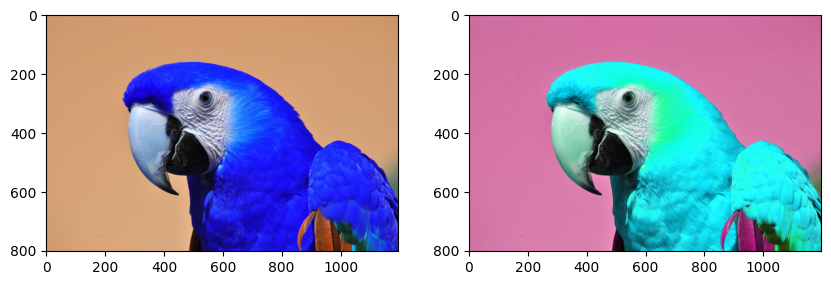

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

## Quality changes

In [ ]:
augmented_parrot = image.stateless_random_jpeg_quality(img_parrot,
                                                       min_jpeg_quality=5,
                                                       max_jpeg_quality=15,
                                                       seed=(1,1))

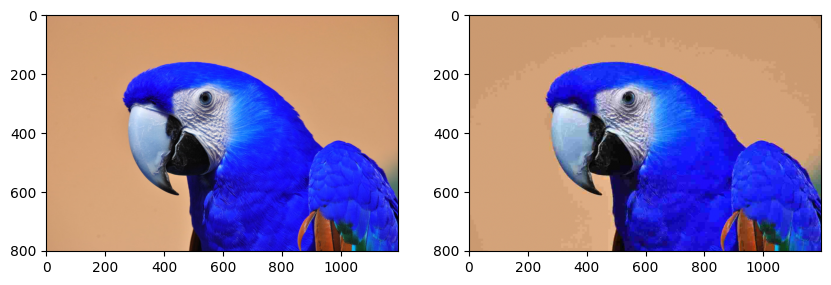

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_parrot)
ax[1].imshow(augmented_parrot)

plt.show()

# Prueba de entrenamiento con Data Augmentation

In [ ]:
(X_train, y_train), (X_test, y_test) =  cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# one hot encode outputs
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)
num_classes = y_test.shape[1]

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Data augmentation preprocessing layers
# More layers at https://keras.io/api/layers/preprocessing_layers/image_augmentation/
x = layers.RandomFlip("horizontal")(input)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

# Keras model
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(num_classes, activation='sigmoid')(x)

model = Model(input, output)

model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          1849

In [ ]:
# Manually loading the dataset
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size=512, epochs = 50)

Epoch 1/50
79/79 [==============================] - 5s 17ms/step - loss: 3.0707 - accuracy: 0.2464 - val_loss: 1.7682 - val_accuracy: 0.3492
Epoch 2/50
79/79 [==============================] - 1s 9ms/step - loss: 1.6635 - accuracy: 0.3942 - val_loss: 1.6420 - val_accuracy: 0.4065
Epoch 3/50
79/79 [==============================] - 1s 10ms/step - loss: 1.5114 - accuracy: 0.4485 - val_loss: 1.5319 - val_accuracy: 0.4410
Epoch 4/50
79/79 [==============================] - 1s 9ms/step - loss: 1.3810 - accuracy: 0.5013 - val_loss: 1.4475 - val_accuracy: 0.4829
Epoch 5/50
79/79 [==============================] - 1s 10ms/step - loss: 1.2816 - accuracy: 0.5406 - val_loss: 1.4344 - val_accuracy: 0.4975
Epoch 6/50
79/79 [==============================] - 1s 10ms/step - loss: 1.1915 - accuracy: 0.5749 - val_loss: 1.3827 - val_accuracy: 0.5054
Epoch 7/50
79/79 [==============================] - 1s 12ms/step - loss: 1.0987 - accuracy: 0.6094 - val_loss: 1.3835 - val_accuracy: 0.5221
Epoch 8/50
79/7

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('acc')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

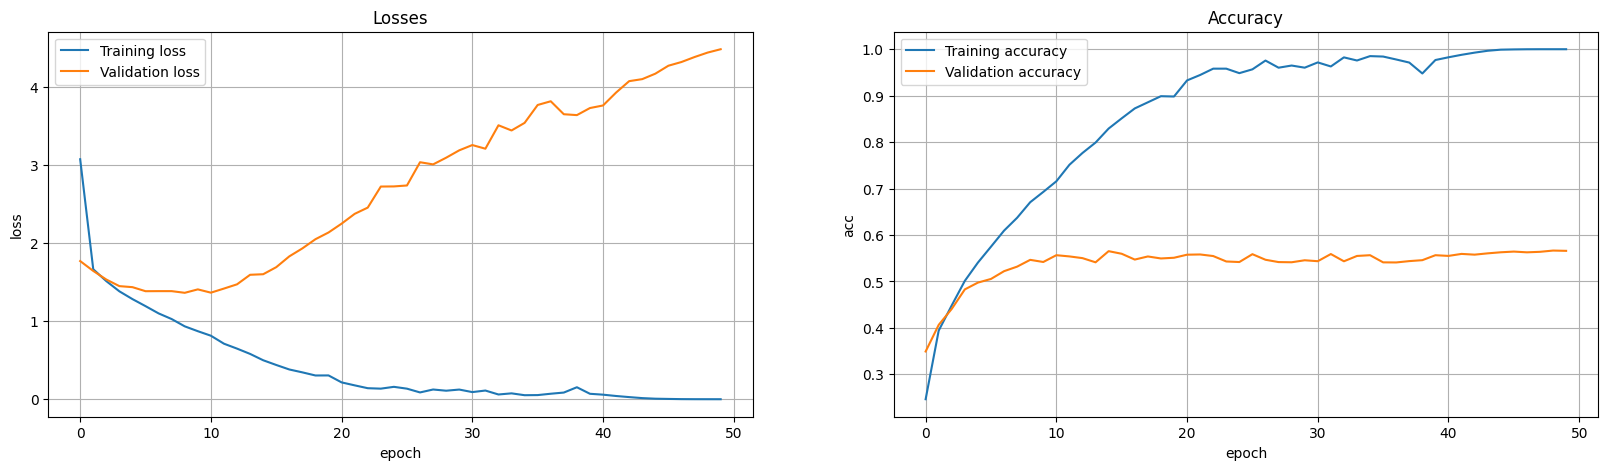

In [ ]:
plot_losses(history.history)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">